
# Part A - Logistic regression

Here you will load a new dataset, and perform a similar analysis as before, but with a logistic regression rather than a linear regression. You should be able to use most of the code from the Week 2 Practical, except for a few changes.

Please consult the documentation for the Logistic Regression function on sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

__________________________

**0.** Run this cell to style your plots!

For more: https://seaborn.pydata.org/tutorial/aesthetics.html

In [1]:
import seaborn as sns
sns.set('talk')
sns.set_style('ticks')

**1.** Load the file `marks.csv` using the python `pandas` library.

In [2]:
import pandas as pd

student_marks = pd.read_csv('marks.csv')

student_marks.head()

,Module 1,Module 2,Work Experience,Admitted
0,94,82,5,1
1,69,67,2,0
2,85,67,2,0
3,78,67,3,0
4,91,92,5,1


**2.** Make a scatterplot with the `Module 1` and the `Admitted` columns.

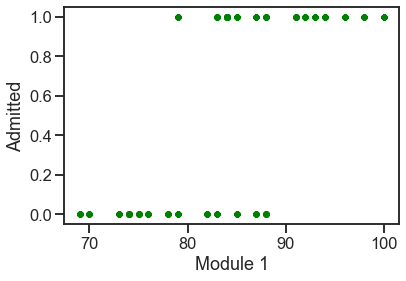

In [3]:
axis = student_marks.plot.scatter(x='Module 1', y='Admitted', c='green')

**3.** Create two variables, `X` and `y`. For `y`, use the `Admitted` column. For `X`, use the `Module 1` and `Module 2` columns.

In [4]:
X = student_marks[['Module 1', 'Module 2']]
y = student_marks['Admitted']

**4.** Import the `train_test_split` tool, and split the data into training/testing sets, 60% for training and 40% for testing, producing `X_train`, `X_test`, `y_train`, and `y_test`.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

**5.** Import the `LogisticRegression` function, and fit the logistic regression to `X_train` and `y_train`.

In [6]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train, y_train)

LogisticRegression()

**6.** Predict the values for the `Admission` column based on `X_test`. Store that in a new variable `y_pred`.

In [7]:
y_pred = logistic_regression.predict(X_test)

**7.** Using the code below, plot the confusion matrix for this classifier.

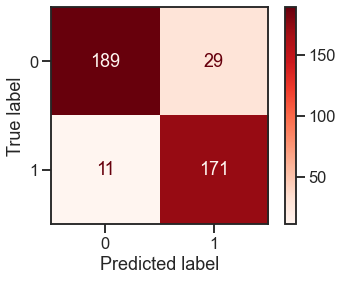

In [8]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logistic_regression, X_test, y_test, cmap='Reds')

# The cmap variable refers to Colormap. Try changing ‘Reds’ to ‘Greens’ or ‘Blues’!

**8.** Using the `.score()` method, print the mean accuracy of this classifier model.

In [9]:
logistic_regression.score(X_test,y_test)

0.9

_______________

# Part B - Perceptron

**1.** Import the numpy, pandas and matplotlib libraries:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2.** Create two circular “blobs” of datapoints:

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2)

**3.** Make a scatterplot for the generated dataset, `X`, and its class labels, `y`, using the `scatter()` function in matplotlib:
https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html

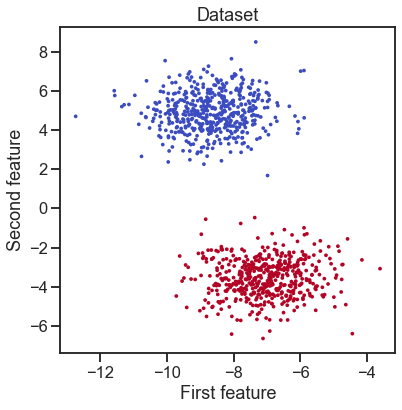

In [12]:
fig = plt.figure(figsize=(6,6))

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=5)

plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.show()

**4.** Using the `train_test_split` tool, split the data into training/testing sets, 80% for training and 20% for testing, producing `X_train`, `X_test`, `y_train`, and `y_test`.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**5.** Import the `Perceptron` function and create a Perceptron with the parameters:
- 40 iterations (also known as epochs) over the data
- a learning rate of 0.1

For more detail, see the documentation:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [14]:
from sklearn.linear_model import Perceptron

perc = Perceptron(max_iter=40, eta0=0.1)

**6.** Train the perceptron model by using the `.fit()` method on the training data ( `X_train` and `y_train` ).

In [15]:
perc.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

**7.** Use the `plot_separation()` function below to plot the line separating both classes.

In [16]:
# You need to run this cell first to tell python to define the plot_separation() function.

def plot_separation(X, y, perceptron):
    
    weights   = perceptron.coef_[0]
    bias      = perceptron.intercept_
    slope     = - weights[0]/weights[1]
    intercept = -bias/weights[1]
    
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])

    x_line = np.linspace(xmin, xmax)
    y_line = slope * x_line + intercept
    
    fig = plt.figure(figsize=(8,6))
    
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=10)
    plt.plot(x_line, y_line, c='green', lw=4)
    
    plt.title("Dataset and fitted decision line")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.xlim(xmin-1, xmax+1)
    plt.ylim(ymin-1, ymax+1)
    
    plt.show()

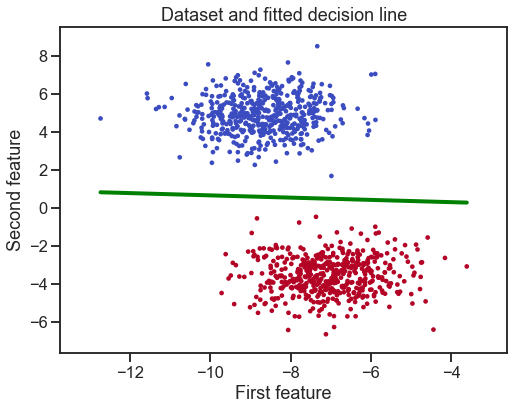

In [17]:
# Above, we have defined the plot_separation function. Now we run it:

plot_separation(X, y, perc)

**8.** Plot the confusion matrix for this classifier, using the `plot_confusion_matrix` tool in the same way as for the logistic regression.

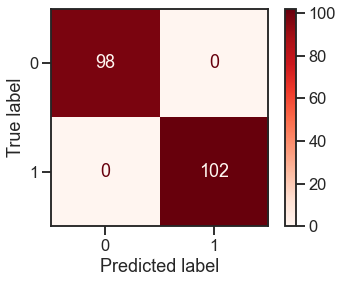

In [18]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(perc, X_test, y_test, cmap='Reds')

**9.** Using the `.score()` method, print the mean accuracy of this classifier model.

In [19]:
perc.score(X_test, y_test)

1.0